In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, Lars, BayesianRidge
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import GLS, WLS, OLS
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from math import log
from scipy import stats

In [162]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 757 to 459
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         808 non-null    int64  
 1   Количество.комнат          808 non-null    int64  
 2   Студия                     808 non-null    int64  
 3   Общая.площадь              808 non-null    float64
 4   Этаж                       808 non-null    int64  
 5   Этажей.в.доме              808 non-null    int64  
 6   Парковка                   808 non-null    int64  
 7   Без.ремонта                808 non-null    int64  
 8   Дизайнерский               808 non-null    int64  
 9   Евроремонт                 808 non-null    int64  
 10  Косметический              808 non-null    int64  
 11  Балкон                     808 non-null    int64  
 12  Лоджия                     808 non-null    int64  
 13  Совмещенный.санузел        808 non-null    int64

In [134]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         783 non-null    int64  
 1   Количество.комнат          783 non-null    int64  
 2   Студия                     783 non-null    int64  
 3   Общая.площадь              783 non-null    float64
 4   Этаж                       783 non-null    int64  
 5   Этажей.в.доме              783 non-null    int64  
 6   Парковка                   783 non-null    int64  
 7   Без.ремонта                783 non-null    int64  
 8   Дизайнерский               783 non-null    int64  
 9   Евроремонт                 783 non-null    int64  
 10  Косметический              783 non-null    int64  
 11  Балкон                     783 non-null    int64  
 12  Лоджия                     783 non-null    int64  
 13  Совмещенный.санузел        783 non-null    int64  

In [137]:
train.describe()

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,794.887376,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,461.218298,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,406.500000,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,774.500000,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,1181.500000,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,1615.000000,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


In [112]:
test.describe()

,id,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Балкон,Лоджия,...,Парк.1000,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,...,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,821.832695,49.970115,4.874840,8.765006,0.137931,0.102171,0.038314,0.080460,0.578544,0.220945,...,0.853129,9.860792,11.485313,4.892720,0.172414,8.638570,13.533844,4.384419,7.475096,14.108557
std,472.975280,20.410938,3.791857,4.877890,0.345048,0.303067,0.192076,0.272178,0.592925,0.472757,...,0.967575,5.548188,16.039018,3.147074,0.419664,9.891658,7.467650,6.528052,7.382261,8.157949
min,0.000000,12.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,402.000000,36.200000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,2.000000,2.000000,0.000000,3.000000,8.000000,1.000000,2.000000,8.000000
50%,832.000000,46.500000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,10.000000,5.000000,5.000000,0.000000,6.000000,12.000000,3.000000,6.000000,13.000000
75%,1240.500000,62.000000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,13.000000,13.000000,7.000000,0.000000,10.000000,18.000000,5.000000,11.000000,19.000000
max,1616.000000,144.000000,25.000000,27.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,...,4.000000,31.000000,81.000000,14.000000,2.000000,72.000000,39.000000,55.000000,44.000000,37.000000


<AxesSubplot:>

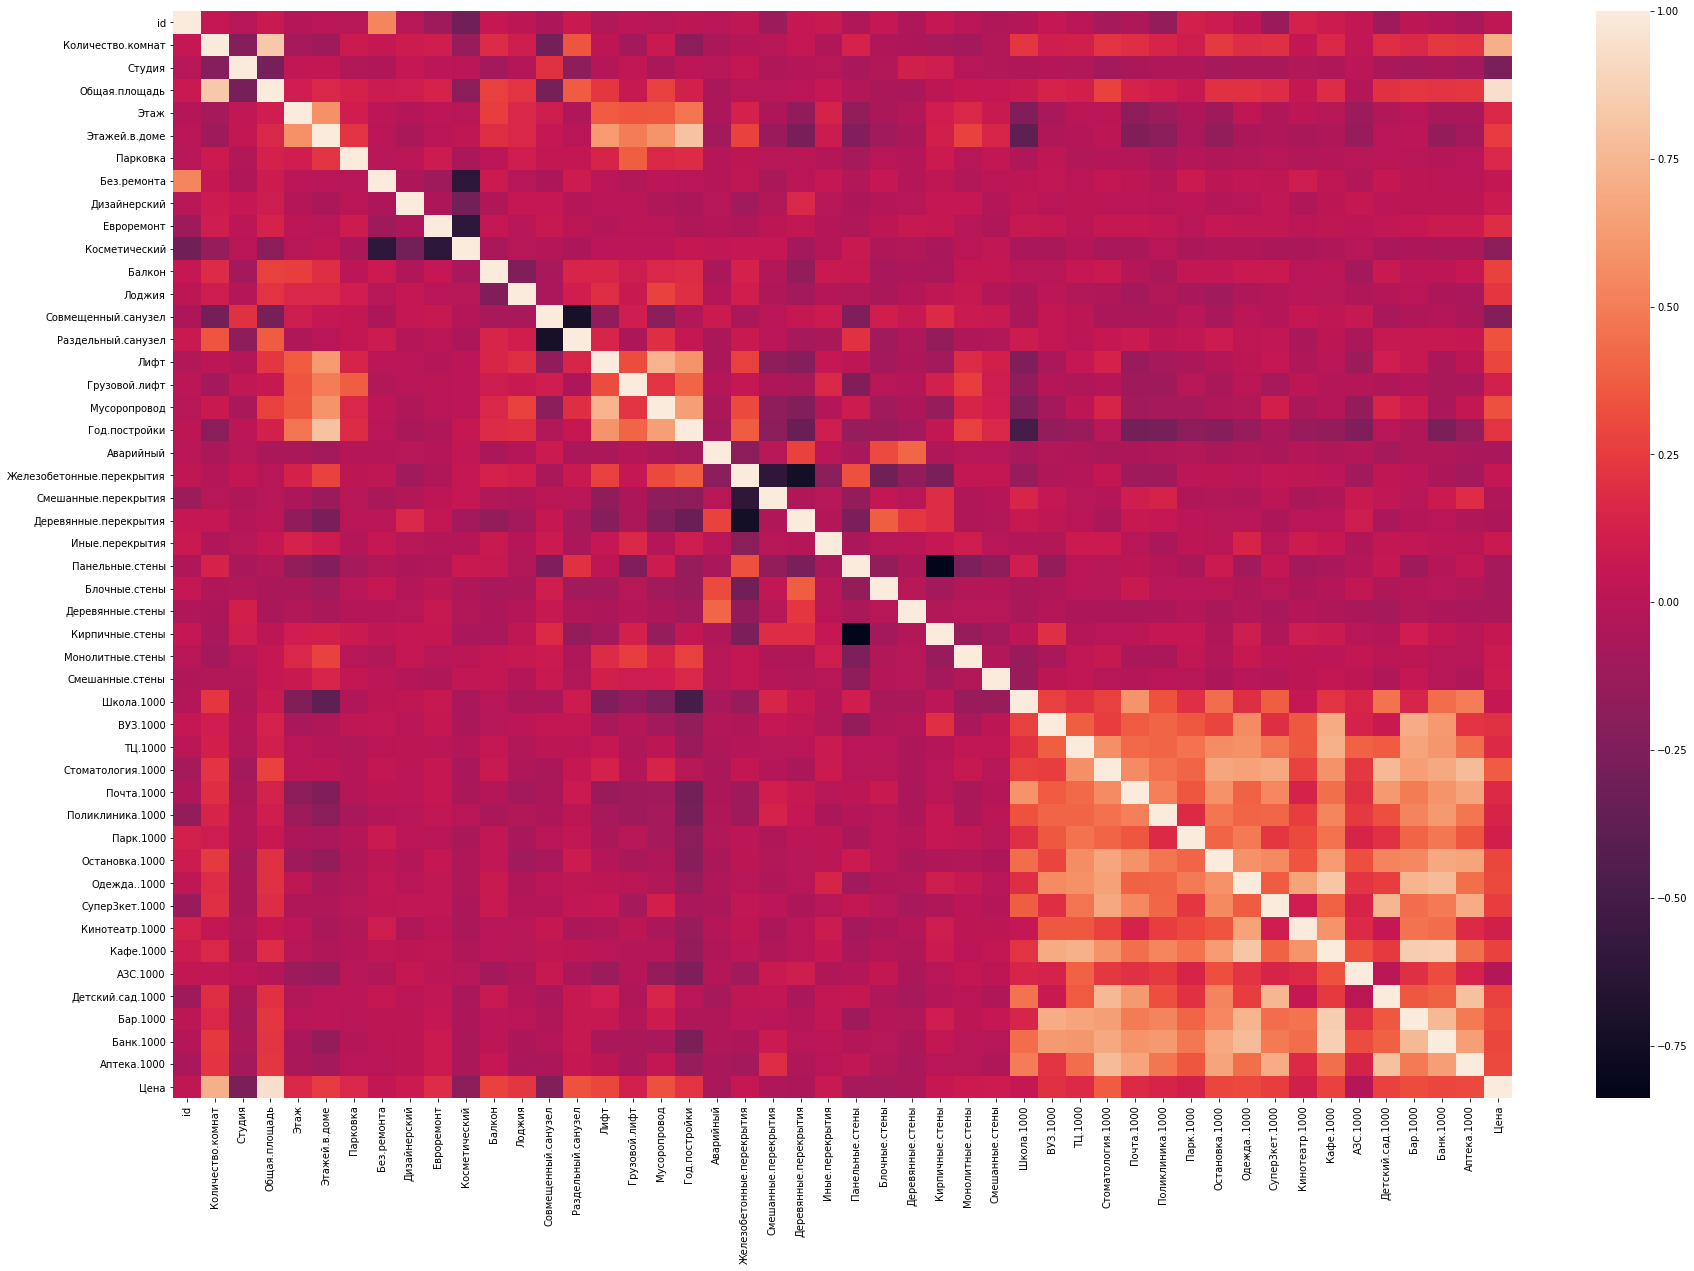

In [23]:
corr = train.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr)

In [163]:
train.drop(['Количество.комнат'], axis = 1, inplace=True)
test.drop(['Количество.комнат'], axis = 1, inplace=True)

In [60]:
corr[abs(corr['Цена']) < 0.3]['Цена'].sort_values(key=lambda x: abs(x))

АЗС.1000                    -0.025196
id                           0.027728
Смешанные.перекрытия        -0.035399
Без.ремонта                  0.037609
Железобетонные.перекрытия    0.046511
Деревянные.перекрытия       -0.051201
Школа.1000                   0.051870
Кирпичные.стены              0.054682
Деревянные.стены            -0.064056
Иные.перекрытия              0.068761
Аварийный                   -0.073951
Панельные.стены             -0.079232
Дизайнерский                 0.079588
Монолитные.стены             0.080280
Смешанные.стены              0.083133
Блочные.стены               -0.083979
Парк.1000                    0.110526
Кинотеатр.1000               0.113988
Грузовой.лифт                0.122235
Поликлиника.1000             0.142381
Парковка                     0.155056
Этаж                         0.165215
ТЦ.1000                      0.167013
Почта.1000                   0.170132
Евроремонт                   0.187698
Косметический               -0.191723
ВУЗ.1000    

In [4]:
repairs_update = []
for row in train.values:
    repairs_update.append(row[6] * 0 + row[7] * 1 + row[8] * 2 + row[9] * 3)
train['Тип.ремонта'] = repairs_update
train.drop(['Без.ремонта', 'Дизайнерский', 'Евроремонт', 'Косметический'], axis = 1, inplace=True)

repairs_update = []
for row in test.values:
    repairs_update.append(row[6] * 0 + row[7] * 1 + row[8] * 2 + row[9] * 3)
test['Тип.ремонта'] = repairs_update
test.drop(['Без.ремонта', 'Дизайнерский', 'Евроремонт', 'Косметический'], axis = 1, inplace=True)

In [125]:
# train.drop(['Студия', 'Косметический', 'Совмещенный.санузел', 'Смешанные.стены', 'Иные.перекрытия', 'АЗС.1000', 'Смешанные.перекрытия', 'Без.ремонта', 'Железобетонные.перекрытия', 'Деревянные.перекрытия'], axis = 1, inplace=True)
# test.drop(['Студия', 'Косметический', 'Совмещенный.санузел', 'Смешанные.стены', 'Иные.перекрытия', 'АЗС.1000', 'Смешанные.перекрытия', 'Без.ремонта', 'Железобетонные.перекрытия', 'Деревянные.перекрытия'], axis = 1, inplace=True)

train.drop(['id', 'Без.ремонта', 'Железобетонные.перекрытия', 'Школа.1000', 'Деревянные.перекрытия', 
            'Студия', 'Косметический', 'Совмещенный.санузел', 'Смешанные.стены', 
            'Иные.перекрытия', 'АЗС.1000', 'Кирпичные.стены', 'Деревянные.стены'], axis = 1, inplace=True)
test.drop(['id', 'Студия', 'Косметический', 'Совмещенный.санузел', 'Смешанные.стены', 'Иные.перекрытия', 'АЗС.1000'], axis = 1, inplace=True)

In [142]:
price = train['Цена']
train.drop(['Цена'], axis = 1, inplace=True)
scaler = preprocessing.MinMaxScaler()
temp = scaler.fit_transform(train)
temp = pd.DataFrame(temp)
new_train = temp.join(price)

scaler = preprocessing.MinMaxScaler()
new_test = scaler.fit_transform(test)
new_test = pd.DataFrame(new_test)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,Цена
0,0.25,0.0,0.268657,0.083333,0.12,0.0,0.0,0.0,0.0,1.0,...,0.023256,0.214286,0.0,0.097222,0.375,0.309524,0.036364,0.159091,0.450,2350000.0
1,0.25,0.0,0.258209,0.166667,0.12,0.0,0.0,0.0,0.0,1.0,...,0.034884,0.357143,0.0,0.097222,0.375,0.261905,0.018182,0.090909,0.275,1799000.0
2,0.25,0.0,0.320896,0.000000,0.28,0.0,1.0,0.0,0.0,0.0,...,0.046512,0.785714,0.0,0.069444,0.375,0.404762,0.054545,0.159091,0.375,2800000.0
3,0.25,0.0,0.402985,0.125000,0.12,0.0,0.0,0.0,1.0,0.0,...,0.360465,0.357143,0.5,0.763889,0.250,0.238095,0.509091,0.727273,0.425,3970000.0
4,0.00,0.0,0.173881,0.000000,0.32,0.0,0.0,1.0,0.0,0.0,...,0.011628,0.214286,0.0,0.027778,0.375,0.214286,0.000000,0.068182,0.150,1880000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,0.25,0.0,0.283582,0.166667,0.12,0.0,0.0,0.0,0.0,1.0,...,0.046512,0.214286,0.0,0.069444,0.125,0.261905,0.000000,0.204545,0.300,NaN
1587,0.75,0.0,0.552239,0.375000,0.32,0.0,0.0,0.0,1.0,0.0,...,0.500000,0.571429,0.0,0.444444,0.625,0.452381,0.327273,0.863636,0.800,NaN
1588,0.00,0.0,0.194030,0.291667,0.32,0.0,0.0,0.0,0.0,1.0,...,0.023256,0.714286,0.0,0.083333,0.375,0.333333,0.018182,0.045455,0.375,NaN
1589,0.25,0.0,0.320896,0.083333,0.12,0.0,0.0,0.0,0.0,1.0,...,0.069767,0.285714,0.5,0.027778,0.750,0.095238,0.018182,0.022727,0.150,NaN


In [151]:
new_train_x = new_train.copy()
new_train_x.drop(['Цена'], axis = 1, inplace=True)
new_train_y = new_train['Цена']
x_train, x_val, y_train, y_val = train_test_split(new_train_x, new_train_y, train_size=0.7)

In [146]:
def aic(y_train, y_pred, columns_count):
    aic = len(y_train) * log(metrics.mean_squared_error(y_train, y_pred)) + 2 * columns_count
    return 'AIC: ' + str(aic)

def adjr(x_train, y_train):
    adjr = 1 - ((1 - model.score(x_train, y_train)) * (len(y_train) - 1) / (len(y_train) - len(x_train.columns) - 1))
    return 'AdjR: ' + str(adjr)

def bic(y_train, y_pred, columns_count):
    bic = len(y_train) * log(metrics.mean_squared_error(y_train, y_pred)) + columns_count * log(len(y_train))
    return 'BIC: ' + str(bic)

def t(y_train, y_pred, X, coef):
    MSE = metrics.mean_squared_error(y_train, y_pred)

    var_b = MSE * (np.linalg.inv(np.dot(X.T, X)).diagonal())

    sd_b = np.sqrt(var_b)

    ts_b = coef / sd_b

    p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(X) - 1))) for i in ts_b]

    sd_b = np.round(sd_b, 3)
    ts_b = np.round(ts_b, 3)
    p_values = np.round(p_values, 3)
    coeff = np.round(coef, 4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"], myDF3["Standard Errors"], myDF3["t_values"], myDF3["p_values"] = [coeff, sd_b, ts_b, p_values]
    print(myDF3)
    
def r_sqr(x_train, y_train):
    return 'R-sqr: ' + str(model.score(x_train, y_train))

In [153]:
model=LinearRegression()
model.fit(x_train, y_train)

y_train_predicted = model.predict(x_train)
y_val_predicted = model.predict(x_val)

print('MAPE ', metrics.mean_absolute_percentage_error(y_val, y_val_predicted))
print(r_sqr(x_train, y_train))
print(adjr(x_train, y_train))
print(aic(y_train, y_train_predicted, len(x_train.columns)))
print(bic(y_train, y_train_predicted, len(x_train.columns)))
t(y_train, y_train_predicted, x_train, model.coef_)

MAPE  0.11417013147609346
R-sqr: 0.9399094252538724
AdjR: 0.9345731966084634
AIC: 14210.546185239222
BIC: 14410.040168871958
    Coefficients  Standard Errors     t_values  p_values
0  -5.001093e+05     1.023579e+05       -4.886     0.000
1   2.636916e+04     6.785067e+04        0.389     0.698
2   7.158524e+06     1.868441e+05       38.313     0.000
3   1.197425e+05     9.369668e+04        1.278     0.202
4   5.621006e+04     1.221259e+05        0.460     0.646
5   2.003664e+04     3.505785e+04        0.572     0.568
6  -7.849215e+17     1.128232e+12  -695709.392     0.000
7  -7.849215e+17     1.133079e+12  -692733.123     0.000
8  -7.849215e+17     1.147498e+12  -684028.398     0.000
9  -7.849215e+17     1.147498e+12  -684028.398     0.000
10  7.955701e+04     8.971345e+04        0.887     0.376
11  5.292412e+04     1.018804e+05        0.519     0.604
12  5.889560e+04     7.170392e+04        0.821     0.412
13  1.601689e+04     6.922097e+04        0.231     0.817
14  3.400581e+05    

<ipython-input-146-8618bd2c3225>:18: RuntimeWarning: invalid value encountered in sqrt
  sd_b = np.sqrt(var_b)


In [68]:
grid_param = {
    'alpha': [0.2, 0.3, 0.5, 0.7, 0.9, 1.0],
    'tol': [1e-3, 1e-4, 1e-5],
    'selection': ['cyclic', 'random']
}

gd_sr = GridSearchCV(estimator=Lasso(),
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_percentage_error',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(new_train_x, new_train_y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'alpha': 1.0, 'selection': 'cyclic', 'tol': 0.001}


In [69]:
lasso=Lasso(alpha=1.0, selection='cyclic', tol=0.001)
lasso.fit(x_train, y_train)

y_train_predicted_lasso = lasso.predict(x_train)
y_val_predicted_lasso = lasso.predict(x_val)

print('MAPE ', metrics.mean_absolute_percentage_error(y_val, y_val_predicted))
print(r_sqr(x_train, y_train))
print(adjr(x_train, y_train))
print(aic(y_train, y_train_predicted, len(x_train.columns)))
print(bic(y_train, y_train_predicted, len(x_train.columns)))
t(y_train, y_train_predicted, x_train, model.coef_)

MAPE  0.10752187410340704
R-sqr: 0.928405075184786
AdjR: 0.9236715264366726
AIC: 16358.967345861922
BIC: 16537.799326013224
    Coefficients  Standard Errors  t values  p_values
0  -2.149432e+05        51900.957    -4.141     0.000
1  -2.581874e+04        66138.257    -0.390     0.696
2   5.277412e+06        83393.661    63.283     0.000
3   1.478182e+05        93459.035     1.582     0.114
4   4.153850e+04       124433.951     0.334     0.739
5   7.820810e+04        37270.812     2.098     0.036
6   2.809417e+05        89531.757     3.138     0.002
7   1.716851e+05        66685.939     2.575     0.010
8   1.662395e+05        71932.258     2.311     0.021
9   1.090016e+05        69640.710     1.565     0.118
10  3.537232e+05       139446.256     2.537     0.011
11 -9.505282e+04        93177.628    -1.020     0.308
12 -5.900293e+04        41860.066    -1.410     0.159
13  3.615613e+05       102396.881     3.531     0.000
14  5.486125e+04       210363.702     0.261     0.794
15  1.906990

In [70]:
grid_param = {
    'alpha': [0.2, 0.3, 0.5, 0.7, 0.9, 1.0],
    'tol': [1e-3, 1e-4, 1e-5],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

gd_sr = GridSearchCV(estimator=Ridge(),
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_percentage_error',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(new_train_x, new_train_y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'alpha': 0.5, 'solver': 'sag', 'tol': 0.001}


In [71]:
model=Ridge(alpha=0.5, solver='sag', tol=0.001)
model.fit(x_train, y_train)

y_train_predicted = model.predict(x_train)
y_val_predicted = model.predict(x_val)

print('MAPE ', metrics.mean_absolute_percentage_error(y_val, y_val_predicted))
print(r_sqr(x_train, y_train))
print(adjr(x_train, y_train))
print(aic(y_train, y_train_predicted, len(x_train.columns)))
print(bic(y_train, y_train_predicted, len(x_train.columns)))
t(y_train, y_train_predicted, x_train, model.coef_)

MAPE  0.10758192916423072
R-sqr: 0.9274225353969491
AdjR: 0.922624025340549
AIC: 16367.77250657608
BIC: 16546.604486727385
    Coefficients  Standard Errors  t values  p_values
0  -1.944134e+05        52255.877    -3.720     0.000
1  -5.906136e+04        66590.538    -0.887     0.375
2   5.082677e+06        83963.941    60.534     0.000
3   1.287596e+05        94098.147     1.368     0.172
4   1.099810e+05       125284.882     0.878     0.380
5   8.274601e+04        37525.685     2.205     0.028
6   3.148413e+05        90144.012     3.493     0.001
7   2.066762e+05        67141.965     3.078     0.002
8   1.583978e+05        72424.161     2.187     0.029
9   1.344017e+05        70116.942     1.917     0.056
10  3.321368e+05       140399.847     2.366     0.018
11 -9.507157e+04        93814.816    -1.013     0.311
12 -4.497570e+04        42146.322    -1.067     0.286
13  3.135725e+05       103097.113     3.042     0.002
14  2.530189e+04       211802.256     0.119     0.905
15  2.367792e

In [72]:
grid_param = {
    'alpha': [0.2, 0.3, 0.5, 0.7, 0.9, 1.0],
    'tol': [1e-3, 1e-4, 1e-5],
    'selection': ['cyclic', 'random'],
    'l1_ratio': [0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 1.0]
}

gd_sr = GridSearchCV(estimator=ElasticNet(),
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_percentage_error',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(new_train_x, new_train_y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'alpha': 1.0, 'l1_ratio': 1.0, 'selection': 'cyclic', 'tol': 0.001}


In [74]:
model=ElasticNet(alpha=1.0, l1_ratio=1.0, selection='cyclic', tol=0.001)
model.fit(x_train, y_train)

y_train_predicted = model.predict(x_train)
y_val_predicted = model.predict(x_val)

print('MAPE ', metrics.mean_absolute_percentage_error(y_val, y_val_predicted))
print(r_sqr(x_train, y_train))
print(adjr(x_train, y_train))
print(aic(y_train, y_train_predicted, len(x_train.columns)))
print(bic(y_train, y_train_predicted, len(x_train.columns)))
t(y_train, y_train_predicted, x_train, model.coef_)

MAPE  0.10751199383766391
R-sqr: 0.9284050690938703
AdjR: 0.9236715199430519
AIC: 16358.967400820167
BIC: 16537.79938097147
    Coefficients  Standard Errors  t values  p_values
0  -2.148798e+05        51900.959    -4.140     0.000
1  -2.579519e+04        66138.260    -0.390     0.697
2   5.277408e+06        83393.665    63.283     0.000
3   1.477460e+05        93459.039     1.581     0.114
4   4.159651e+04       124433.957     0.334     0.738
5   7.817996e+04        37270.814     2.098     0.036
6   2.808808e+05        89531.760     3.137     0.002
7   1.716537e+05        66685.942     2.574     0.010
8   1.662114e+05        71932.261     2.311     0.021
9   1.089600e+05        69640.713     1.565     0.118
10  3.535700e+05       139446.262     2.536     0.011
11 -9.491588e+04        93177.632    -1.019     0.309
12 -5.894248e+04        41860.068    -1.408     0.160
13  3.614611e+05       102396.885     3.530     0.000
14  5.460141e+04       210363.711     0.260     0.795
15  1.894957

In [49]:
grid_param = {
    'n_nonzero_coefs': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024],
}

gd_sr = GridSearchCV(estimator=Lars(),
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_percentage_error',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(new_train_x, new_train_y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'n_nonzero_coefs': 8}


In [50]:
model=Lars(n_nonzero_coefs=8)
model.fit(x_train, y_train)

y_train_predicted = model.predict(x_train)
y_val_predicted = model.predict(x_val)

print('MAPE ', metrics.mean_absolute_percentage_error(y_val, y_val_predicted))
print(r_sqr(x_train, y_train))
print(adjr(x_train, y_train))
print(aic(y_train, y_train_predicted, len(x_train.columns)))
print(bic(y_train, y_train_predicted, len(x_train.columns)))
t(y_train, y_train_predicted, x_train, model.coef_)

MAPE  0.11403201609113454
R-sqr: 0.9011119442459581
AdjR: 0.8945738909729636
AIC: 16567.602265192854
BIC: 16746.434245344157
    Coefficients  Standard Errors  t values  p_values
0   0.000000e+00        60996.675     0.000     1.000
1   0.000000e+00        77729.084     0.000     1.000
2   5.164862e+06        98008.522    52.698     0.000
3   0.000000e+00       109837.868     0.000     1.000
4   2.060521e+05       146241.183     1.409     0.159
5   0.000000e+00        43802.576     0.000     1.000
6   0.000000e+00       105222.328     0.000     1.000
7   0.000000e+00        78372.747     0.000     1.000
8   0.000000e+00        84538.492     0.000     1.000
9   0.000000e+00        81845.347     0.000     1.000
10  2.629154e+04       163884.416     0.160     0.873
11  0.000000e+00       109507.144     0.000     1.000
12  0.000000e+00        49196.104     0.000     1.000
13  5.942125e+04       120342.084     0.494     0.622
14  0.000000e+00       247230.248     0.000     1.000
15  0.00000

In [75]:
grid_param = {
    'alpha_1': [1e-8, 1e-7, 1e-6, 1e-4, 1e-3, 0.1],
    'alpha_2': [1e-8, 1e-7, 1e-6, 1e-4, 1e-3, 0.1],
    'tol': [1e-3, 1e-4, 1e-5],
    'lambda_1': [1e-8, 1e-7, 1e-6, 1e-4, 1e-3, 0.1],
    'lambda_2': [1e-8, 1e-7, 1e-6, 1e-4, 1e-3, 0.1]
}

gd_sr = GridSearchCV(estimator=BayesianRidge(),
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_percentage_error',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(new_train_x, new_train_y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'alpha_1': 1e-08, 'alpha_2': 0.1, 'lambda_1': 1e-06, 'lambda_2': 0.0001, 'tol': 0.001}


In [168]:
model=BayesianRidge(tol=0.001, alpha_1=1e-8, alpha_2=0.1, lambda_1=1e-06, lambda_2=0.0001)
model.fit(x_train, y_train)

y_train_predicted = model.predict(x_train)
y_val_predicted = model.predict(x_val)

print('MAPE ', metrics.mean_absolute_percentage_error(y_val, y_val_predicted))
print(r_sqr(x_train, y_train))
print(adjr(x_train, y_train))
print(aic(y_train, y_train_predicted, len(x_train.columns)))
print(bic(y_train, y_train_predicted, len(x_train.columns)))
t(y_train, y_train_predicted, x_train, model.coef_)

MAPE  0.313142005697241
R-sqr: 0.16248541534806826
AdjR: 0.09855300430593605
AIC: 15700.751494100323
BIC: 15874.22452334618
    Coefficients  Standard Errors      t values  p_values
0  -0.000000e+00       203150.425 -0.000000e+00     1.000
1  -3.335628e+05       792315.162 -4.210000e-01     0.674
2   2.467329e+06       333245.009  7.404000e+00     0.000
3  -6.447866e+03       444100.007 -1.500000e-02     0.988
4  -2.618464e+05       134588.810 -1.946000e+00     0.052
5   1.432714e+04       177629.237  8.100000e-02     0.936
6  -7.513554e+05       284304.048 -2.643000e+00     0.008
7  -3.155395e+05       159733.524 -1.975000e+00     0.049
8   9.240792e+05       310656.203  2.975000e+00     0.003
9   4.630892e+05       238268.890  1.944000e+00     0.052
10 -2.341332e+04       193906.458 -1.210000e-01     0.904
11  8.888295e+05       461191.208  1.927000e+00     0.054
12  6.057454e+05       319539.567  1.896000e+00     0.059
13 -1.101977e+05       148320.631 -7.430000e-01     0.458
14 -1.

In [169]:
x=sm.add_constant(x_train)
xv=sm.add_constant(x_val)
model=GLS(endog=y_train, exog=x)
res=model.fit()

y_train_predicted = model.predict(params=res.params, exog=x)
y_val_predicted = model.predict(params=res.params, exog=xv)

print('MAPE ', metrics.mean_absolute_percentage_error(y_val, y_val_predicted))
print(aic(y_train, y_train_predicted, len(x_train.columns)))
print(bic(y_train, y_train_predicted, len(x_train.columns)))
res.summary()

MAPE  7.926480087943908e-16
AIC: -22435.264310851868
BIC: -22261.79128160601


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                   Цена   R-squared:                       1.000
Model:                            GLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.310e+30
Date:                Sat, 15 May 2021   Prob (F-statistic):               0.00
Time:                        13:02:46   Log-Likelihood:                 10456.
No. Observations:                 565   AIC:                        -2.083e+04
Df Residuals:                     525   BIC:                        -2.066e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.277e+05   7.18e-10   5.96e+14      0.000    4.28e+05    4.28e+05
0           8.731e-10   4.64e-10      1.880      0.061   -3.92e-11    1.79e-09
1            3.18e-09   1.81e-09      1.755      0.080   -3.79e-10    6.74e-09
2           4.857e-09   7.62e-10      6.375      0.000    3.36e-09    6.35e-09
3           3.503e-09   1.02e-09      3.451      0.001    1.51e-09     5.5e-09
4           1.219e-10   3.08e-10      0.396      0.692   -4.83e-10    7.26e-10
5           6.241e-10   4.06e-10      1.537      0.125   -1.74e-10    1.42e-09
6          -2.728e-10    6.5e-10     -0.420      0.675   -1.55e-09       1e-09
7           1.161e-09   3.65e-10      3.178      0.002    4.43e-10    1.88e-09
8          -1.844e-09    7.1e-10     -2.597      0.010   -3.24e-09   -4.49e-10
9           5.227e-10   5.45e-10      0.960      0.338   -5.47e-10    1.59e-09
10         -9.022e-10   4.43e-10     -2.035      0.042   -1.77e-09   -3.14e-11
11         -9.868e-10   1.05e-09     -0.936      0.350   -3.06e-09    1.08e-09
12          1.408e-09    7.3e-10      1.927      0.054   -2.71e-11    2.84e-09
13         -1.103e-09   3.39e-10     -3.252      0.001   -1.77e-09   -4.37e-10
14         -1.233e-09   8.64e-10     -1.428      0.154   -2.93e-09    4.63e-10
15          6.889e-10   1.87e-09      0.368      0.713   -2.99e-09    4.36e-09
16           1.31e-10   6.04e-10      0.217      0.829   -1.06e-09    1.32e-09
17         -7.174e-09   2.48e-09     -2.891      0.004    -1.2e-08    -2.3e-09
18          7.129e+04   5.21e-10   1.37e+14      0.000    7.13e+04    7.13e+04
19          7.129e+04   7.51e-10   9.49e+13      0.000    7.13e+04    7.13e+04
20          7.129e+04   2.51e-09   2.84e+13      0.000    7.13e+04    7.13e+04
21          7.129e+04   5.25e-10   1.36e+14      0.000    7.13e+04    7.13e+04
22          7.129e+04   6.67e-10   1.07e+14      0.000    7.13e+04    7.13e+04
23          7.129e+04   7.66e-10   9.31e+13      0.000    7.13e+04    7.13e+04
24          5.435e-09   1.04e-09      5.233      0.000    3.39e-09    7.48e-09
25          2.365e-09   1.44e-09      1.640      0.102   -4.68e-10     5.2e-09
26         -1.226e-09   1.11e-09     -1.106      0.269    -3.4e-09    9.52e-10
27          3.218e-09   1.46e-09      2.199      0.028    3.43e-10    6.09e-09
28         -1.251e-09   7.68e-10     -1.630      0.104   -2.76e-09    2.57e-10
29         -1.924e-09   8.48e-10     -2.270      0.024   -3.59e-09   -2.59e-10
30          1.455e-11   5.66e-10      0.026      0.980    -1.1e-09    1.13e-09
31          2.394e-09   9.48e-10      2.526      0.012    5.32e-10    4.26e-09
32         -1.701e-09   1.34e-09     -1.267      0.206   -4.34e-09    9.36e-10
33         -1.217e-09   7.06e-10     -1.723      0.086    -2.6e-09    1.71e-10
34          3.261e-09   8.46e-10      3.857      0.000     1.6e-09    4.92e-09
35

In [170]:
x=sm.add_constant(x_train)
xv=sm.add_constant(x_val)
model=OLS(endog=y_train, exog=x)
res=model.fit()

y_train_predicted = model.predict(params=res.params, exog=x)
y_val_predicted = model.predict(params=res.params, exog=xv)

print('MAPE ', metrics.mean_absolute_percentage_error(y_val, y_val_predicted))
print(aic(y_train, y_train_predicted, len(x_train.columns)))
print(bic(y_train, y_train_predicted, len(x_train.columns)))
res.summary()

MAPE  7.926480087943908e-16
AIC: -22435.264310851868
BIC: -22261.79128160601


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Цена   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.310e+30
Date:                Sat, 15 May 2021   Prob (F-statistic):               0.00
Time:                        13:02:52   Log-Likelihood:                 10456.
No. Observations:                 565   AIC:                        -2.083e+04
Df Residuals:                     525   BIC:                        -2.066e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.277e+05   7.18e-10   5.96e+14      0.000    4.28e+05    4.28e+05
0           8.731e-10   4.64e-10      1.880      0.061   -3.92e-11    1.79e-09
1            3.18e-09   1.81e-09      1.755      0.080   -3.79e-10    6.74e-09
2           4.857e-09   7.62e-10      6.375      0.000    3.36e-09    6.35e-09
3           3.503e-09   1.02e-09      3.451      0.001    1.51e-09     5.5e-09
4           1.219e-10   3.08e-10      0.396      0.692   -4.83e-10    7.26e-10
5           6.241e-10   4.06e-10      1.537      0.125   -1.74e-10    1.42e-09
6          -2.728e-10    6.5e-10     -0.420      0.675   -1.55e-09       1e-09
7           1.161e-09   3.65e-10      3.178      0.002    4.43e-10    1.88e-09
8          -1.844e-09    7.1e-10     -2.597      0.010   -3.24e-09   -4.49e-10
9           5.227e-10   5.45e-10      0.960      0.338   -5.47e-10    1.59e-09
10         -9.022e-10   4.43e-10     -2.035      0.042   -1.77e-09   -3.14e-11
11         -9.868e-10   1.05e-09     -0.936      0.350   -3.06e-09    1.08e-09
12          1.408e-09    7.3e-10      1.927      0.054   -2.71e-11    2.84e-09
13         -1.103e-09   3.39e-10     -3.252      0.001   -1.77e-09   -4.37e-10
14         -1.233e-09   8.64e-10     -1.428      0.154   -2.93e-09    4.63e-10
15          6.889e-10   1.87e-09      0.368      0.713   -2.99e-09    4.36e-09
16           1.31e-10   6.04e-10      0.217      0.829   -1.06e-09    1.32e-09
17         -7.174e-09   2.48e-09     -2.891      0.004    -1.2e-08    -2.3e-09
18          7.129e+04   5.21e-10   1.37e+14      0.000    7.13e+04    7.13e+04
19          7.129e+04   7.51e-10   9.49e+13      0.000    7.13e+04    7.13e+04
20          7.129e+04   2.51e-09   2.84e+13      0.000    7.13e+04    7.13e+04
21          7.129e+04   5.25e-10   1.36e+14      0.000    7.13e+04    7.13e+04
22          7.129e+04   6.67e-10   1.07e+14      0.000    7.13e+04    7.13e+04
23          7.129e+04   7.66e-10   9.31e+13      0.000    7.13e+04    7.13e+04
24          5.435e-09   1.04e-09      5.233      0.000    3.39e-09    7.48e-09
25          2.365e-09   1.44e-09      1.640      0.102   -4.68e-10     5.2e-09
26         -1.226e-09   1.11e-09     -1.106      0.269    -3.4e-09    9.52e-10
27          3.218e-09   1.46e-09      2.199      0.028    3.43e-10    6.09e-09
28         -1.251e-09   7.68e-10     -1.630      0.104   -2.76e-09    2.57e-10
29         -1.924e-09   8.48e-10     -2.270      0.024   -3.59e-09   -2.59e-10
30          1.455e-11   5.66e-10      0.026      0.980    -1.1e-09    1.13e-09
31          2.394e-09   9.48e-10      2.526      0.012    5.32e-10    4.26e-09
32         -1.701e-09   1.34e-09     -1.267      0.206   -4.34e-09    9.36e-10
33         -1.217e-09   7.06e-10     -1.723      0.086    -2.6e-09    1.71e-10
34          3.261e-09   8.46e-10      3.857      0.000     1.6e-09    4.92e-09
35

In [79]:
grid_param = {
    'splitter': ['best', 'random'],
    'max_depth': [None, 8, 64, 256, 1024, 4096],
}

gd_sr = GridSearchCV(estimator=tree.DecisionTreeRegressor(),
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_percentage_error',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(new_train_x, new_train_y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'max_depth': 64, 'splitter': 'best'}


In [10]:
model=tree.DecisionTreeRegressor(criterion='mae', max_depth=16, splitter='best')
model.fit(x_train, y_train)

y_train_predicted = model.predict(x_train)
y_val_predicted = model.predict(x_val)

print('MAPE ', metrics.mean_absolute_percentage_error(y_val, y_val_predicted))
print(r_sqr(x_train, y_train))
print(adjr(x_train, y_train))

MAPE  0.0036312219496498857
R-sqr: 1.0
AdjR: 1.0


In [111]:
grid_param = {
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'learning_rate': [0.001, 0.01, 0.1, 0.4],
    'n_estimators': [8, 32, 128, 512]
}

gd_sr = GridSearchCV(estimator=GradientBoostingRegressor(),
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_percentage_error',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(new_train_x, new_train_y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 128}


In [158]:
# super_model = model

model=GradientBoostingRegressor(learning_rate= 0.1, loss='ls', n_estimators=128)
model.fit(x_train, y_train)

y_train_predicted = model.predict(x_train)
y_val_predicted = model.predict(x_val)

# print(y_val, y_val_predicted)

print('MAPE ', metrics.mean_absolute_percentage_error(y_val, y_val_predicted))
print(r_sqr(x_train, y_train))
print(adjr(x_train, y_train))
print(aic(y_train, y_train_predicted, len(x_train.columns)))
print(bic(y_train, y_train_predicted, len(x_train.columns)))

MAPE  0.09872031005950722
R-sqr: 0.9838633582554933
AdjR: 0.9824303746256723
AIC: 13467.706541037367
BIC: 13667.200524670103


In [160]:
# print(test.info())
# print(new_test.info())

print(new_test)

test_id = test['id']
y2 = model.predict(new_test)

submission = pd.DataFrame({
    'id': test_id,
    'Цена': y
})

submission

        0    1         2         3     4    5    6    7    8    9   ...  \
808   0.00  0.0  0.216418  0.125000  0.56  0.0  0.0  0.0  0.0  1.0  ...   
809   0.00  0.0  0.185075  0.000000  0.00  0.0  0.0  0.0  0.0  1.0  ...   
810   0.00  0.0  0.206716  0.041667  0.60  0.0  0.0  0.0  0.0  1.0  ...   
811   0.75  0.0  0.548507  0.375000  0.32  0.0  0.0  0.0  0.0  1.0  ...   
812   0.00  0.0  0.238806  0.375000  0.32  0.0  0.0  0.0  0.0  1.0  ...   
...    ...  ...       ...       ...   ...  ...  ...  ...  ...  ...  ...   
1586  0.25  0.0  0.283582  0.166667  0.12  0.0  0.0  0.0  0.0  1.0  ...   
1587  0.75  0.0  0.552239  0.375000  0.32  0.0  0.0  0.0  1.0  0.0  ...   
1588  0.00  0.0  0.194030  0.291667  0.32  0.0  0.0  0.0  0.0  1.0  ...   
1589  0.25  0.0  0.320896  0.083333  0.12  0.0  0.0  0.0  0.0  1.0  ...   
1590  0.25  0.0  0.300000  0.000000  0.08  1.0  0.0  0.0  0.0  1.0  ...   

            36        37        38   39        40     41        42        43  \
808   0.225806  0.0

,id,Цена
0,747,6.154288e+06
1,962,5.691956e+06
2,1105,6.227427e+06
3,795,6.309392e+06
4,390,6.277002e+06
...,...,...
778,1060,5.679086e+06
779,67,6.482875e+06
780,754,6.346102e+06
781,1077,6.315572e+06


In [161]:
submission.to_csv("sub.csv", index=False)